In [ ]:
!pip install jax jaxlib


In [ ]:
import jax.numpy as jnp
from jax import random, grad, value_and_grad, jit
import jax

class ThreeLayerNN:
    def __init__(self, rng_key, input_dim=3, hidden_dim=64, output_dim=1):
        keys = random.split(rng_key, 3)
        # Adjust weight initialization with a smaller scale to avoid large initial values
        self.W1 = random.normal(keys[0], (input_dim, hidden_dim)) * 0.01
        self.b1 = jnp.zeros(hidden_dim)

        self.W2 = random.normal(keys[1], (hidden_dim, hidden_dim)) * 0.01
        self.b2 = jnp.zeros(hidden_dim)

        self.W3 = random.normal(keys[2], (hidden_dim, output_dim)) * 0.01
        self.b3 = jnp.zeros(output_dim)

    def predict(self, params, x):
        W1, b1, W2, b2, W3, b3 = params
        x = jax.nn.relu(jnp.dot(x, W1) + b1)
        x = jax.nn.relu(jnp.dot(x, W2) + b2)
        x = jnp.dot(x, W3) + b3
        return x

    # Adjust mse_loss to accept parameters if not already.
    def mse_loss(self, params, x, y):
        pred = self.predict(params, x)
        return jnp.mean((pred - y) ** 2)

    # New update method
    def update(self, params, x, y, lr=0.001):
        # Get the gradient of the loss function with respect to the parameters
        get_loss_grad = jit(value_and_grad(self.mse_loss))
        loss, grads = get_loss_grad(params, x, y)

        # Update the parameters using gradient descent
        new_params = [(param - lr * grad) for param, grad in zip(params, grads)]
        return new_params, loss

In [ ]:
import numpy as np
import jax.numpy as jnp
from jax import random, value_and_grad, jit
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Your ThreeLayerNN class definition remains the same.

def generate_data(num_samples=1000):
    np.random.seed(42)
    x = np.random.uniform(-2, 2, (num_samples, 3))
    y = np.sin(x[:, 0]) + np.cos(x[:, 1]) * np.power(x[:, 2], 2)
    return x, y

# Generate data and split into training and test sets
x, y = generate_data()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert numpy arrays to JAX arrays
x_train, y_train, x_test, y_test = map(jnp.array, [x_train, y_train, x_test, y_test])

def train(model, x, y, epochs=1000, lr=0.01):
    params = [model.W1, model.b1, model.W2, model.b2, model.W3, model.b3]
    for epoch in range(epochs):
        params, loss = model.update(params, x, y, lr)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss {loss}")
    return params  # Return the final parameters after training

# Initialize the model and start training
rng_key = random.PRNGKey(42)
model = ThreeLayerNN(rng_key)
final_params = train(model, x_train, y_train)  # Ensure to use x_train and y_train

def evaluate_model(model, params, x_test, y_test):
    preds_test = model.predict(params, x_test)
    mse_test = jnp.mean((preds_test - y_test) ** 2)
    return mse_test

# Evaluate the trained model on the test set
test_loss = evaluate_model(model, final_params, x_test, y_test)
print(f"Test MSE Loss: {test_loss}")





# Plot predictions for the test datase


Epoch 0: Loss 1.8965518474578857
Epoch 100: Loss 1.526614785194397
Epoch 200: Loss 1.5202312469482422
Epoch 300: Loss 1.5201210975646973
Epoch 400: Loss 1.5201196670532227
Epoch 500: Loss 1.5201196670532227
Epoch 600: Loss 1.5201191902160645
Epoch 700: Loss 1.5201189517974854
Epoch 800: Loss 1.5201189517974854
Epoch 900: Loss 1.5201189517974854
Test MSE Loss: 1.4545094966888428


In [ ]:
def plot_predictions_vs_actual(params, x_test, y_test, model):
    preds_test = model.predict(params, x_test)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, preds_test, alpha=0.5)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predicted vs. Actual Values')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.show()

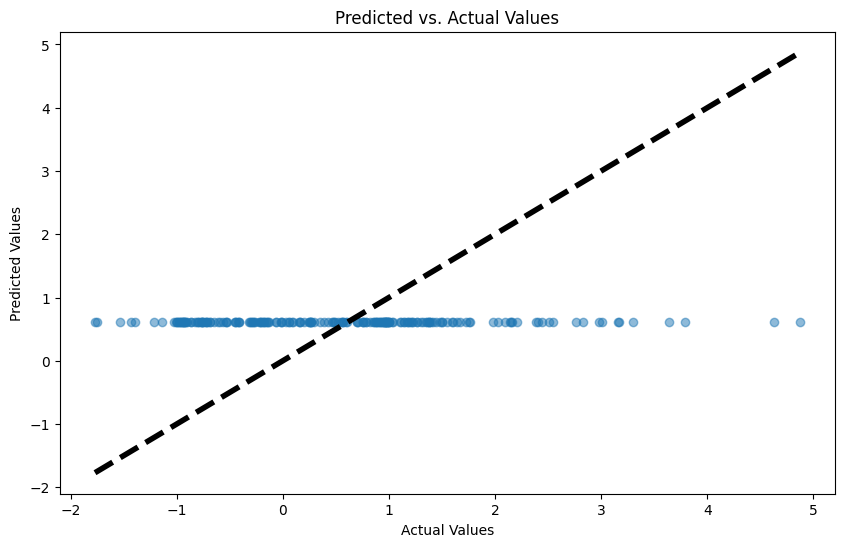

In [ ]:
# Assuming `final_params`, `x_test`, `y_test` are already defined, and `model` is your model instance
plot_predictions_vs_actual(final_params, x_test, y_test, model)
